In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import requests
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import gensim

In [2]:
df = pd.read_csv('medrxiv_abstracts.csv')
df

,Unnamed: 0,Unnamed: 0.1,doi,title,authors,author_corresponding,author_corresponding_institution,date,version,type,license,category,jatsxml,abstract,published,server
0,0,0,10.1101/001891,Population genomics of Saccharomyces cerevisia...,Carlotta De Filippo;Monica Di Paola;Irene Stef...,Duccio Cavalieri,Fondazione E. Mach (FEM),2014-01-17,1,New Results,cc_by_nc_nd,Evolutionary Biology,https://www.biorxiv.org/content/early/2014/01/...,The quest for the ecological niches of Sacchar...,NaN,biorxiv
1,1,1,10.1101/001867,Estimating seed bank accumulation and dynamics...,Meaghan E. Jenkins;David Morrison;Tony D. Auld;,David Morrison,Swedish University of Agricultural Sciences,2014-01-17,1,New Results,cc_by_nc,Ecology,https://www.biorxiv.org/content/early/2014/01/...,The seed bank dynamics of the three co-occurri...,NaN,biorxiv
2,2,2,10.1101/001875,How and where to look for tRNAs in Metazoan mi...,David Morrison;,David Morrison,Swedish University of Agricultural Sciences,2014-01-17,1,New Results,cc_by_nc,Molecular Biology,https://www.biorxiv.org/content/early/2014/01/...,The ability to locate and annotate mitochondri...,NaN,biorxiv
3,3,3,10.1101/001875,How and where to look for tRNAs in Metazoan mi...,David Morrison;,David Morrison,Swedish University of Agricultural Sciences,2014-01-22,2,New Results,cc_by_nc,Molecular Biology,https://www.biorxiv.org/content/early/2014/01/...,The ability to locate and annotate mitochondri...,NaN,biorxiv
4,4,4,10.1101/001883,Tracking global changes induced in the CD4 T c...,Niclas Thomas;Katharine Best;Mattia Cinelli;Sh...,Benny Chain,UCL,2014-01-17,1,New Results,cc_no,Immunology,https://www.biorxiv.org/content/early/2014/01/...,The clonal theory of adaptive immunity propose...,10.1093/bioinformatics/btu523,biorxiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267811,17811,11,10.1101/2023.05.21.541661,Shell protein composition specified by NEAT1 d...,"Takakuwa, H.; Yamazaki, T.; Souquere, S.; Adac...",Tomohiro Yamazaki,Osaka University,2023-05-22,1,new results,cc_by_nc_nd,cell biology,https://www.biorxiv.org/content/early/2023/05/...,Many membraneless organelles (MLOs) formed thr...,NaN,biorxiv
267812,17812,12,10.1101/2023.05.20.541601,Creating Optimal Conditions for OPA1 isoforms ...,"Stephens, D. C.; Crabtree, A.; Beasley, H. K.;...",Antentor Hinton Jr.,Vanderbilt University,2023-05-22,1,new results,cc_by_nc_nd,cell biology,https://www.biorxiv.org/content/early/2023/05/...,OPA1 is a dynamin-related GTPase that modulate...,NaN,biorxiv
267813,17813,13,10.1101/2023.05.20.541600,Components of Isolated Skeletal Muscle Differe...,"Stephens, D. C.; Mungai, M.; Crabtree, A.; Bea...",Antentor Hinton Jr.,Vanderbilt University,2023-05-22,1,new results,cc_by_nc_nd,cell biology,https://www.biorxiv.org/content/early/2023/05/...,Isolation of skeletal muscles allows for the e...,NaN,biorxiv
267814,17814,14,10.1101/2023.05.20.541599,Optimizing In Situ Proximity Ligation Assays f...,"Stephens, D. C.; Crabtree, A.; Beasley, H. K.;...",Antentor Hinton Jr.,Vanderbilt University,2023-05-22,1,new results,cc_by_nc_nd,cell biology,https://www.biorxiv.org/content/early/2023/05/...,Proximity ligation assays (PLA) use specific a...,NaN,biorxiv


In [12]:
df['abstract']

0         The quest for the ecological niches of Sacchar...
1         The seed bank dynamics of the three co-occurri...
2         The ability to locate and annotate mitochondri...
3         The ability to locate and annotate mitochondri...
4         The clonal theory of adaptive immunity propose...
                                ...                        
267811    Many membraneless organelles (MLOs) formed thr...
267812    OPA1 is a dynamin-related GTPase that modulate...
267813    Isolation of skeletal muscles allows for the e...
267814    Proximity ligation assays (PLA) use specific a...
267815    The mammalian cell cycle alternates between tw...
Name: abstract, Length: 267816, dtype: object

In [4]:
df['abstract'][0]

'The quest for the ecological niches of Saccharomyces cerevisiae ranged from wineries to oaks and more recently to the gut of Crabro Wasps. Here we propose the role of the human gut in shaping S. cerevisiae evolution, presenting the genetic structure of a previously unknown population of yeasts, associated with Crohns disease, providing evidence for clonal expansion within humans gut. To understand the role of immune function in the human-yeast interaction we classified strains according to their immunomodulatory properties, discovering a set of genetically homogeneous isolates, capable of inducing anti-inflammatory signals via regulatory T cells proliferation, and on the contrary, a positive association between strain mosaicism and ability to elicit inflammatory, IL-17 driven, immune responses. The approach integrating genomics with immune phenotyping showed selection on genes involved in sporulation and cell wall remodeling as central for the evolution of S. cerevisiae Crohns strains

In [5]:
gensim.utils.simple_preprocess(df['abstract'][0])

['the',
 'quest',
 'for',
 'the',
 'ecological',
 'niches',
 'of',
 'saccharomyces',
 'cerevisiae',
 'ranged',
 'from',
 'wineries',
 'to',
 'oaks',
 'and',
 'more',
 'recently',
 'to',
 'the',
 'gut',
 'of',
 'crabro',
 'wasps',
 'here',
 'we',
 'propose',
 'the',
 'role',
 'of',
 'the',
 'human',
 'gut',
 'in',
 'shaping',
 'cerevisiae',
 'evolution',
 'presenting',
 'the',
 'genetic',
 'structure',
 'of',
 'previously',
 'unknown',
 'population',
 'of',
 'yeasts',
 'associated',
 'with',
 'crohns',
 'disease',
 'providing',
 'evidence',
 'for',
 'clonal',
 'expansion',
 'within',
 'humans',
 'gut',
 'to',
 'understand',
 'the',
 'role',
 'of',
 'immune',
 'function',
 'in',
 'the',
 'human',
 'yeast',
 'interaction',
 'we',
 'classified',
 'strains',
 'according',
 'to',
 'their',
 'properties',
 'discovering',
 'set',
 'of',
 'genetically',
 'homogeneous',
 'isolates',
 'capable',
 'of',
 'inducing',
 'anti',
 'inflammatory',
 'signals',
 'via',
 'regulatory',
 'cells',
 'prolifera

In [6]:
abstracts_preprocessed = df['abstract'].fillna('').astype(str).apply(gensim.utils.simple_preprocess)
abstracts_preprocessed

0         [the, quest, for, the, ecological, niches, of,...
1         [the, seed, bank, dynamics, of, the, three, co...
2         [the, ability, to, locate, and, annotate, mito...
3         [the, ability, to, locate, and, annotate, mito...
4         [the, clonal, theory, of, adaptive, immunity, ...
                                ...                        
267811    [many, membraneless, organelles, mlos, formed,...
267812    [opa, is, dynamin, related, gtpase, that, modu...
267813    [isolation, of, skeletal, muscles, allows, for...
267814    [proximity, ligation, assays, pla, use, specif...
267815    [the, mammalian, cell, cycle, alternates, betw...
Name: abstract, Length: 267816, dtype: object

In [7]:
model = gensim.models.Word2Vec(window=10, min_count=2, workers=4)
model

In [8]:
model.build_vocab(abstracts_preprocessed, progress_per=1000)

In [9]:
model.corpus_count

267816

In [15]:
model.epochs

5

In [16]:
model.train(abstracts_preprocessed, total_examples=model.corpus_count, epochs=model.epochs)

(237663631, 290738425)

In [17]:
model.save('./gensim-trained-on-267816-medrxiv-abstracts')

In [ ]:
# proton citric fumaric succinic cytochrome CD CTLA TCR BCR CRISPR CAS9 PAM RNA heme MHC DNA ribosome polymerase trna nuclease

In [ ]:
# mitochondria nucleus golgi ER lysosome peroxisome endosome bacteria phage virus fungi brain heart stomach intestine muscles bones eyes ears

In [ ]:
# luria macconkey acrylamide bis nitrocellulose block antibody

In [ ]:
# luria macconkey acrylamide bis nitrocellulose 

In [ ]:
# proteins carbohydrates vitamins minerals lipids cholesterol steroids peptide cellulose starch glycogen amino acids

In [ ]:
# crystallography NMR dichroism elisa western cryoEM spectroscopy FACS FRET CCK transwell HeLa residue liposome MRI cytometry spectrometry mice 

In [ ]:
# connexin occludin microtubule dynein actin myosin kinesin gpcr DNA histone chromatin nucleosome membrane phospholipid sphingolipid polymerase helicase cholesterol

Enter words here:proton citric fumaric succinic cytochrome CD CTLA TCR BCR CRISPR CAS9 PAM RNA heme MHC DNA ribosome polymerase trna nuclease


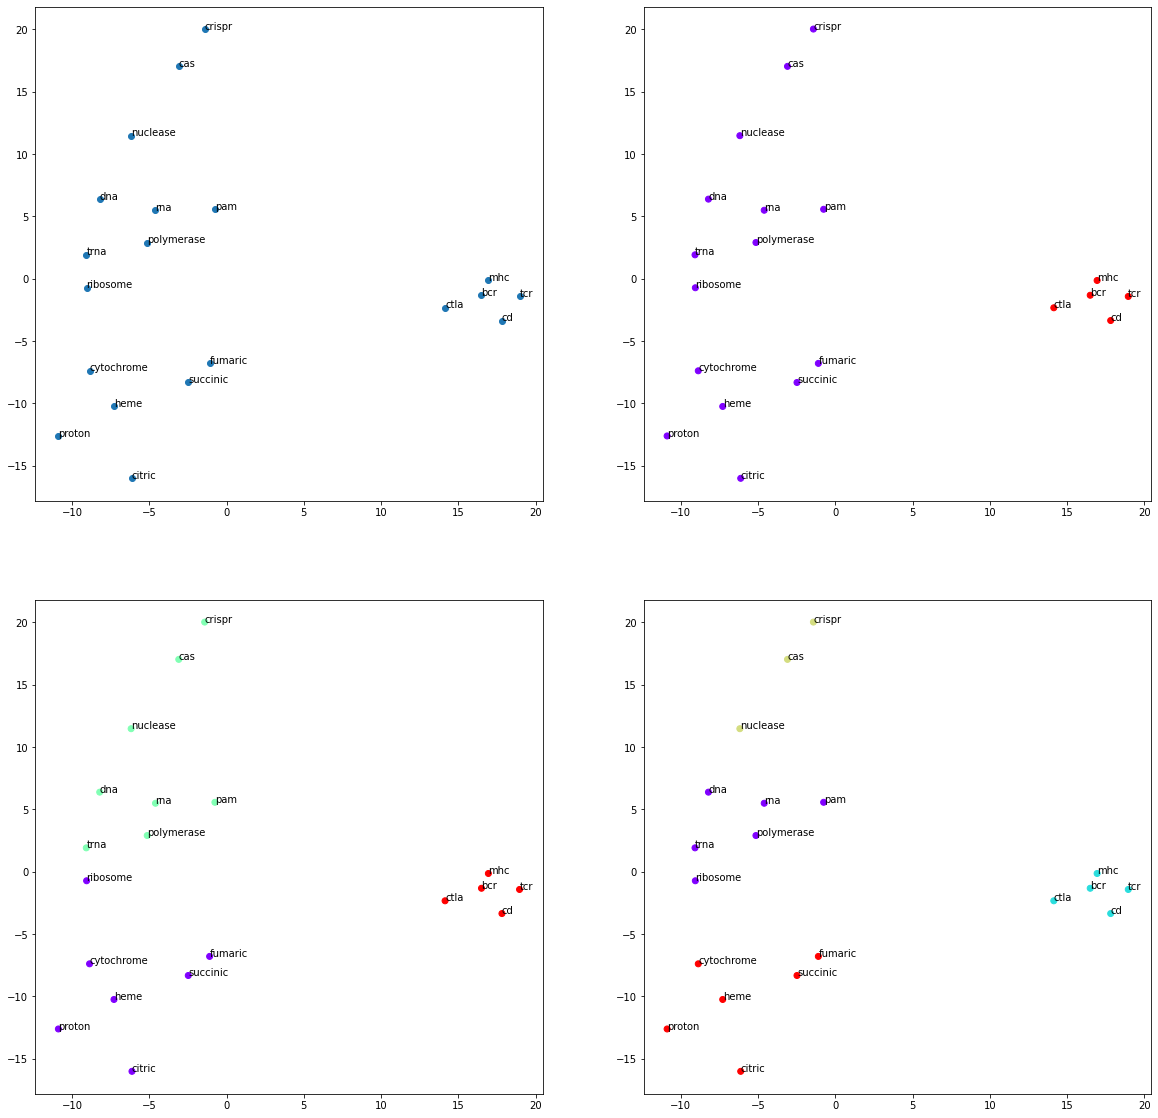

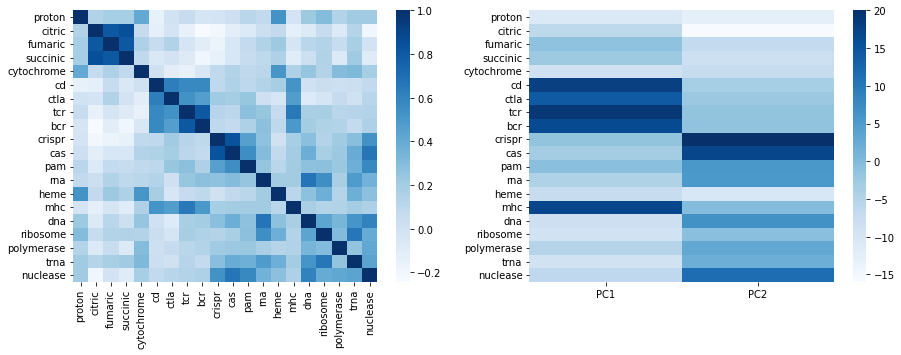

In [27]:
# get input words and preprocess them
inp = gensim.utils.simple_preprocess(input('Enter words here:'))

# get embeddings of input words
f = []
for w in inp:
    f.append(model.wv[w])
f = pd.DataFrame(f)

# create similarity matrix of input words
d = []
for i in inp:
    c = []
    for j in inp:
        c.append(model.wv.similarity(i, j))
    d.append(c)
d = pd.DataFrame(d)

# principal component analysis of input word embeddings
pca = PCA(n_components=2)
columns = ['PC1', 'PC2']
components = pd.DataFrame(data=pca.fit_transform(f), index=inp, columns=columns)

# create multiple scatter plots of principle components with K means cluster labelling
# 'int' object is not iterable: traceback happened because of for w in len(components) being passed instead of 
# for w in range(0, len(components))

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0, 0].scatter(x=components['PC1'], y=components['PC2'])
for w in range(0, len(components)):
    ax[0, 0].annotate(text=components.index[w], xy=(components['PC1'][w], components['PC2'][w]))
    
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(components)
ax[0, 1].scatter(x=components['PC1'], y=components['PC2'], c=kmeans.labels_, cmap='rainbow')
for w in range(0, len(components)):
    ax[0, 1].annotate(text=components.index[w], xy=(components['PC1'][w], components['PC2'][w]))
    
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(components)
ax[1, 0].scatter(x=components['PC1'], y=components['PC2'], c=kmeans.labels_, cmap='rainbow')
for w in range(0, len(components)):
    ax[1, 0].annotate(text=components.index[w], xy=(components['PC1'][w], components['PC2'][w]))
    
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(components)
ax[1, 1].scatter(x=components['PC1'], y=components['PC2'], c=kmeans.labels_, cmap='rainbow')
for w in range(0, len(components)):
    ax[1, 1].annotate(text=components.index[w], xy=(components['PC1'][w], components['PC2'][w]))
    
plt.show()

# create heatmaps of similarity matrix and principle components
# mentioning axis as an argument within sns.heatmap method is necessary to avoide superimposition of the two heatmaps.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0] = sns.heatmap(d, cmap='Blues', xticklabels=inp, yticklabels=inp, ax=ax[0])
ax[1] = sns.heatmap(components, cmap='Blues', ax=ax[1])
plt.show() 

Enter words here:electron microscopy dichroism spectroscopy


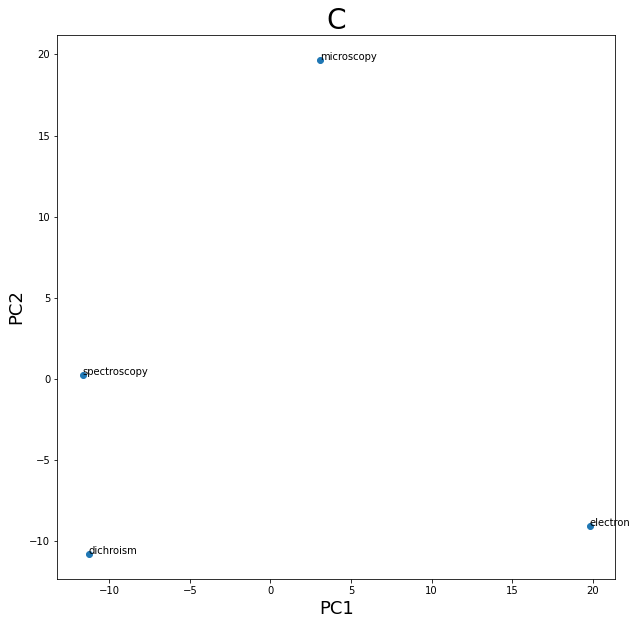

In [53]:
# get input words and preprocess them
inp = gensim.utils.simple_preprocess(input('Enter words here:'))

# get embeddings of input words
f = []
for w in inp:
    f.append(model.wv[w])
f = pd.DataFrame(f)

# create similarity matrix of input words
d = []
for i in inp:
    c = []
    for j in inp:
        c.append(model.wv.similarity(i, j))
    d.append(c)
d = pd.DataFrame(d)

# principal component analysis of input word embeddings
pca = PCA(n_components=2)
columns = ['PC1', 'PC2']
components = pd.DataFrame(data=pca.fit_transform(f), index=inp, columns=columns)

#kmeans = KMeans(n_clusters=3)
#clusters = kmeans.fit(components)

# see https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size for setting label
# and title font size
plt.figure(figsize=(10, 10))
#, c=kmeans.labels_, cmap='rainbow'
plt.scatter(x=components['PC1'], y=components['PC2'])
for w in range(0, len(components)):
    plt.annotate(text=components.index[w], xy=(components['PC1'][w], components['PC2'][w]))
plt.title('C', fontsize=28)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)
plt.savefig('technique_analogy.jpg')
plt.show()

Enter words here:# mitochondria nucleus golgi ER lysosome peroxisome endosome bacteria phage virus fungi brain heart stomach intestine muscles bones eyes ears


<AxesSubplot:title={'center':'H'}>

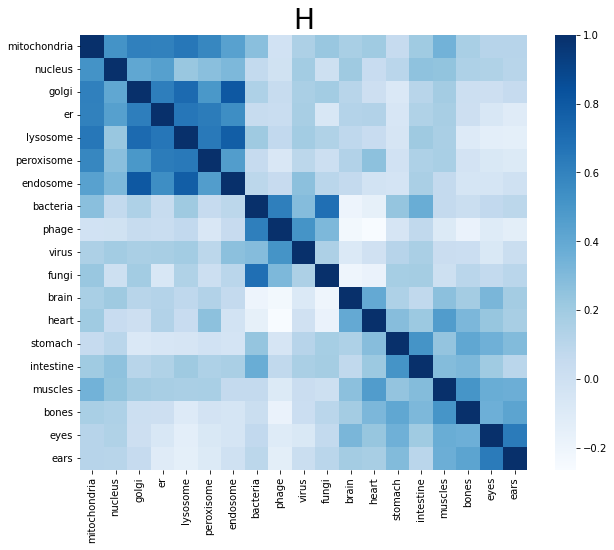

In [37]:
# get input words and preprocess them
inp = gensim.utils.simple_preprocess(input('Enter words here:'))

# get embeddings of input words
f = []
for w in inp:
    f.append(model.wv[w])
f = pd.DataFrame(f)

# create similarity matrix of input words
d = []
for i in inp:
    c = []
    for j in inp:
        c.append(model.wv.similarity(i, j))
    d.append(c)
d = pd.DataFrame(d)

# principal component analysis of input word embeddings
pca = PCA(n_components=2)
columns = ['PC1', 'PC2']
components = pd.DataFrame(data=pca.fit_transform(f), index=inp, columns=columns)

plt.figure(figsize=(10, 8))
plt.title('H', fontsize=28)
heatmap = sns.heatmap(d, cmap='Blues', xticklabels=inp, yticklabels=inp)
plt.savefig('./subject_terms_heatmap.jpg', bbox_inches='tight')
heatmap

In [ ]:
# Terms seem to have levels of heierarchy. 
# Organnel names cluster better with each other than with their components for example.
# Terms not properly related to others in the plot end up near the centre of the plot.

In [52]:
model.wv.most_similar('transwell')

[('caco', 0.6866745352745056),
 ('boyden', 0.6865997910499573),
 ('mtt', 0.679652988910675),
 ('monolayer', 0.6671547889709473),
 ('matrigel', 0.6644216179847717),
 ('microtiter', 0.6406615376472473),
 ('suspension', 0.6312974691390991),
 ('huvec', 0.628460168838501),
 ('explant', 0.6239063739776611),
 ('hbec', 0.6212572455406189)]

In [53]:
model.wv.most_similar('ctla')

[('pdl', 0.7769878506660461),
 ('tigit', 0.7540072202682495),
 ('btla', 0.7115106582641602),
 ('nkg', 0.6953796148300171),
 ('icos', 0.6947286128997803),
 ('cd', 0.6849516034126282),
 ('costimulation', 0.6776027083396912),
 ('ici', 0.6763678789138794),
 ('icb', 0.6733208894729614),
 ('hvem', 0.6694339513778687)]

In [54]:
model.wv.most_similar('cytochrome')

[('oxidase', 0.8252739310264587),
 ('monooxygenase', 0.7482576370239258),
 ('oxidoreductase', 0.7428713440895081),
 ('reductase', 0.7411077618598938),
 ('oxidases', 0.7389943599700928),
 ('multicopper', 0.7302781343460083),
 ('cytb', 0.715122640132904),
 ('dehydrogenases', 0.7101704478263855),
 ('dehydrogenase', 0.7101283073425293),
 ('quinone', 0.6906180381774902)]

In [16]:
model.wv.most_similar(positive=['adenine', 'cytosine'], negative=['guanine'])

[('methylcytosine', 0.72357577085495),
 ('deamination', 0.7165867686271667),
 ('uracil', 0.710002064704895),
 ('dinucleotide', 0.6676029562950134),
 ('inosine', 0.6579427123069763),
 ('cytosines', 0.647170901298523),
 ('cytidine', 0.6324256062507629),
 ('pseudouridine', 0.6221858859062195),
 ('hmc', 0.6216849088668823),
 ('methyladenine', 0.616907000541687)]

In [19]:
model.wv.most_similar(positive=['electron', 'crystallography'], negative=['microscopy'])

[('ray', 0.6312138438224792),
 ('catalysis', 0.5715832710266113),
 ('crystal', 0.5693216323852539),
 ('restraints', 0.5659825801849365),
 ('microbalance', 0.557868242263794),
 ('holo', 0.5364004373550415),
 ('crystallization', 0.5360074639320374),
 ('em', 0.5345504879951477),
 ('apo', 0.5335423350334167),
 ('melb', 0.5314224362373352)]

In [22]:
model.wv.most_similar(positive=['electron', 'spectroscopy'], negative=['microscopy'])

[('epr', 0.6075983643531799),
 ('forster', 0.5977441072463989),
 ('deuterium', 0.5975708365440369),
 ('nmr', 0.5809394121170044),
 ('amide', 0.574830949306488),
 ('dipolar', 0.5587149858474731),
 ('calorimetry', 0.5564249753952026),
 ('ftir', 0.5544590353965759),
 ('hydrogen', 0.5514416694641113),
 ('magnetization', 0.5470761656761169)]

In [23]:
model.wv.most_similar(positive=['microscopy', 'dichroism'], negative=['electron'])

[('spectroscopy', 0.576087236404419),
 ('afm', 0.5679469704627991),
 ('scattering', 0.5384120345115662),
 ('spectroscopies', 0.520254909992218),
 ('circular', 0.491657018661499),
 ('microscopies', 0.4905138909816742),
 ('unzipping', 0.4718126356601715),
 ('tweezers', 0.47008147835731506),
 ('nmr', 0.46829715371131897),
 ('ssnmr', 0.46776553988456726)]

In [17]:
model.wv.most_similar('membrane', topn=100)

{'membranes': 0.8225950598716736,
 'leaflet': 0.7250165939331055,
 'pore': 0.6926084160804749,
 'anionic': 0.6669583916664124,
 'phospholipids': 0.6659455299377441,
 'cardiolipin': 0.6583842039108276,
 'translocon': 0.6471569538116455,
 'raft': 0.6471287608146667,
 'phospholipid': 0.6468673944473267,
 'pores': 0.6461843848228455,
 'bilayer': 0.6450006365776062,
 'exoplasmic': 0.6437204480171204,
 'nanodomains': 0.6397601366043091,
 'phagophore': 0.6347137093544006,
 'pm': 0.6336931586265564,
 'caveolae': 0.6323006749153137,
 'rcsf': 0.626401424407959,
 'nanodomain': 0.6217858791351318,
 'periplasm': 0.6183885931968689,
 'vesicle': 0.6143595576286316,
 'peroxisomes': 0.6121261119842529,
 'surface': 0.6110690236091614,
 'osbp': 0.6104423999786377,
 'lumenal': 0.6054307818412781,
 'transmembrane': 0.6043672561645508,
 'macropinosomes': 0.6032389402389526,
 'lipids': 0.6025853753089905,
 'rafts': 0.6005483269691467,
 'tether': 0.593628466129303,
 'envelope': 0.5922178626060486,
 'vacuole':

In [18]:
model.wv.most_similar('kinesin', topn=100)

[('dynein', 0.885014533996582),
 ('kif', 0.8172690868377686),
 ('dynactin', 0.7859879732131958),
 ('kinesins', 0.7814967632293701),
 ('mts', 0.7777038812637329),
 ('microtubule', 0.7729673981666565),
 ('dyneins', 0.764840304851532),
 ('microtubules', 0.751796305179596),
 ('klp', 0.7363385558128357),
 ('clasp', 0.716634213924408),
 ('mcak', 0.7131146192550659),
 ('motors', 0.7087603211402893),
 ('katanin', 0.7066112756729126),
 ('tubulins', 0.6925167441368103),
 ('axonemal', 0.6885350346565247),
 ('formin', 0.6795573234558105),
 ('myosins', 0.6776868104934692),
 ('detyrosination', 0.6763756275177002),
 ('rangtp', 0.6731135249137878),
 ('tubulin', 0.6714226603507996),
 ('camsap', 0.6684368252754211),
 ('myosin', 0.6675145030021667),
 ('numa', 0.6664663553237915),
 ('lis', 0.6621227264404297),
 ('bicd', 0.6605161428451538),
 ('severing', 0.6565791368484497),
 ('minus', 0.652937114238739),
 ('ddb', 0.6442524194717407),
 ('ndc', 0.6426541209220886),
 ('actin', 0.6424984931945801),
 ('profil

In [28]:
a = dict(model.wv.most_similar('membrane', topn=500))
b = dict(model.wv.most_similar('kinesin', topn=500))
c = []
for k, v in a.items():
    if k in b:
        c.append(k)
c

['clathrin',
 'cytoplasmic',
 'endocytosis',
 'transport',
 'cytoskeleton',
 'cargo',
 'dynamins',
 'septins',
 'ftsz',
 'actin',
 'ftsa',
 'dynamin',
 'bbsome',
 'copii',
 'rotor',
 'ezrin',
 'mitofusins',
 'ftsn',
 'seca',
 'microtubules',
 'exocyst',
 'kinetochore',
 'ring',
 'gtpase',
 'microtubule',
 'mts',
 'rabs',
 'kinetochores',
 'stator',
 'filament',
 'gtp',
 'dynein',
 'linker',
 'filaments',
 'actomyosin',
 'septin',
 'tethering',
 'axoneme',
 'stvs',
 'flagella',
 'mreb',
 'ciliary',
 'dyneins',
 'rab',
 'protrusions',
 'cme',
 'snx',
 'atp',
 'proteasomes',
 'earp',
 'retromer',
 'lamellipodium',
 'phafin']

In [29]:
a = dict(model.wv.most_similar('membrane', topn=500))
b = dict(model.wv.most_similar('dynein', topn=500))
c = []
for k, v in a.items():
    if k in b:
        c.append(k)
c

['vesicle',
 'escrts',
 'tether',
 'clathrin',
 'cytoplasmic',
 'endocytosis',
 'microvilli',
 'escrt',
 'snare',
 'cytoskeleton',
 'golgin',
 'mitochondria',
 'tubulation',
 'cargo',
 'dynamins',
 'endocytic',
 'septins',
 'ftsz',
 'actin',
 'ftsa',
 'dynamin',
 'bbsome',
 'copii',
 'rotor',
 'ezrin',
 'mitofusins',
 'ftsn',
 'heh',
 'divisome',
 'cytoskeletal',
 'seca',
 'microtubules',
 'endosomes',
 'autophagosomal',
 'desmosomes',
 'tethers',
 'tip',
 'exocyst',
 'kinetochore',
 'ring',
 'golgins',
 'midbody',
 'gtpase',
 'microtubule',
 'cytoplasm',
 'snarepin',
 'mts',
 'rabs',
 'kinetochores',
 'stator',
 'exocytic',
 'filament',
 'ftswi',
 'gtp',
 'autophagosomes',
 'filaments',
 'actomyosin',
 'septin',
 'tethering',
 'axoneme',
 'stvs',
 'flagella',
 'mistargeted',
 'mreb',
 'chmp',
 'ciliary',
 'ufl',
 'dyneins',
 'rab',
 'cme',
 'snx',
 'atp',
 'proteasomes',
 'earp',
 'retromer',
 'lamellipodium',
 'phafin']

In [23]:
a = dict(model.wv.most_similar('membrane', topn=500))
b = dict(model.wv.most_similar('polymerase', topn=500))
c = []
for k, v in a.items():
    if k in b:
        c.append(k)
len(c)

0

In [24]:
a = dict(model.wv.most_similar('membrane', topn=500))
b = dict(model.wv.most_similar('helicase', topn=500))
c = []
for k, v in a.items():
    if k in b:
        c.append(k)
c

['ufl']

In [25]:
a = dict(model.wv.most_similar('membrane', topn=500))
b = dict(model.wv.most_similar('gpcr', topn=500))
c = []
for k, v in a.items():
    if k in b:
        c.append(k)
len(c)

17

In [26]:
a = dict(model.wv.most_similar('membrane', topn=500))
b = dict(model.wv.most_similar('connexin', topn=500))
c = []
for k, v in a.items():
    if k in b:
        c.append(k)
len(c)

13

In [35]:
for abstract in df['abstract']:
    if 'kinesin' and 'membrane' in abstract:
        print(abstract)

Clathrin-mediated endocytosis (CME) is the major internalisation route for many different receptor types in mammalian cells. CME is shut down during early mitosis, but the mechanism of this inhibition is unclear. Here we show that the mitotic shutdown is due to an unmet requirement for actin in CME. In mitotic cells, membrane tension is increased and this invokes a requirement for the actin cytoskeleton to assist the CME machinery to overcome the increased load. However, the actin cytoskeleton is engaged in the formation of a rigid cortex in mitotic cells and is therefore unavailable for deployment. We demonstrate that CME can be \"restarted\" in mitotic cells despite high membrane tension, by allowing actin to engage in endocytosis. Mitotic phosphorylation of endocytic proteins is maintained in mitotic cells with restored CME, indicating that direct phosphorylation of the CME machinery does not account for shutdown.
Clathrin-mediated endocytosis (CME) is the major internalisation rout

TypeError: argument of type 'float' is not iterable

In [40]:
df['abstract'][0]

'The quest for the ecological niches of Saccharomyces cerevisiae ranged from wineries to oaks and more recently to the gut of Crabro Wasps. Here we propose the role of the human gut in shaping S. cerevisiae evolution, presenting the genetic structure of a previously unknown population of yeasts, associated with Crohns disease, providing evidence for clonal expansion within humans gut. To understand the role of immune function in the human-yeast interaction we classified strains according to their immunomodulatory properties, discovering a set of genetically homogeneous isolates, capable of inducing anti-inflammatory signals via regulatory T cells proliferation, and on the contrary, a positive association between strain mosaicism and ability to elicit inflammatory, IL-17 driven, immune responses. The approach integrating genomics with immune phenotyping showed selection on genes involved in sporulation and cell wall remodeling as central for the evolution of S. cerevisiae Crohns strains

In [52]:
if 'quest' in df['abstract'][0]:
    if 'ecological' in df['abstract'][0]:
        print('both present')
    else:
        print('one present')
else:
    print('both absent')

both present


In [53]:
df[df['abstract'].str.contains('membrane'|'kinesin', na=False)]

TypeError: unsupported operand type(s) for |: 'str' and 'str'